In [2]:
import pandas as pd

# Load the dataset from Excel
df = pd.read_excel("mock_route_data.xlsx")

# Display the first few rows
df.head()

,Route_ID,Driver,Region,Date,Miles,Cost,Deliveries,On_Time_Deliveries,Avg_Service_Time
0,R001,Driver_2,North,2025-02-17,134.90,116.82,13,3,14.31
1,R002,Driver_9,North,2025-02-07,86.64,NaN,18,1,16.59
2,R003,Driver_1,South,2025-02-15,167.38,85.41,18,7,18.84
3,R004,Driver_3,West,2025-01-22,102.57,60.69,13,2,12.37
4,R005,Driver_7,North,2025-01-23,127.26,91.11,16,8,5.43


In [3]:
# Column Checks Types and nulls
df.info()

# Look at unique values and sample entries
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Route_ID            50 non-null     object 
 1   Driver              48 non-null     object 
 2   Region              50 non-null     object 
 3   Date                50 non-null     object 
 4   Miles               39 non-null     float64
 5   Cost                45 non-null     float64
 6   Deliveries          50 non-null     int64  
 7   On_Time_Deliveries  50 non-null     int64  
 8   Avg_Service_Time    50 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.6+ KB


,Route_ID,Driver,Region,Date,Miles,Cost,Deliveries,On_Time_Deliveries,Avg_Service_Time
39,R040,Driver_2,North,2025-02-17,91.71,90.42,9,4,22.02
38,R039,Driver_9,North,2025-02-12,115.16,87.45,14,14,17.02
27,R028,Driver_8,South,2025-02-25,77.44,58.41,7,7,20.21
46,R047,Driver_1,South,2025-02-17,137.61,75.02,15,13,25.95
36,R037,Driver_2,South,2025-02-02,120.15,85.15,13,2,13.83


In [4]:
# Replace 'N/A' with NaN and convert to float
df['Miles'] = pd.to_numeric(df['Miles'], errors='coerce')

In [5]:
# Replace empty strings with NaN
df['Driver'] = df['Driver'].replace('', pd.NA)

In [6]:
# Check how many missing values we have
df.isna().sum()

Route_ID               0
Driver                 2
Region                 0
Date                   0
Miles                 11
Cost                   5
Deliveries             0
On_Time_Deliveries     0
Avg_Service_Time       0
dtype: int64

Here we can see that row Driver had 2 rows for missing names, 11 rows had missing Mile values and 5 rows had no costs inputed

In [7]:
df_clean = df.dropna()

We will proceed to drop the data containing no values. 

Now we need to proceed to make sure that the dataset makes since.  In this case we can first check for on time deliveries and see if they are not exeeding deliveries variable.

In [8]:
df_clean = df_clean[df_clean['On_Time_Deliveries'] <= df_clean['Deliveries']]

No invalid data.  Data makes since for this variable. 

Step 3.  We will analyize ratio data to provide insights.  This will consist of On_Time_Rate,Cost_Per_Mile as well as Deliveries_Per_Mile

In [10]:
# Avoid division errors by checking for 0 values
df_clean = df_clean.copy()

df_clean['On_Time_Rate'] = df_clean['On_Time_Deliveries'] / df_clean['Deliveries']
df_clean['Cost_Per_Mile'] = df_clean['Cost'] / df_clean['Miles']
df_clean['Deliveries_Per_Mile'] = df_clean['Deliveries'] / df_clean['Miles']

Overall Summary Statistics 

In [12]:
df_clean[['On_Time_Rate', 'Cost_Per_Mile', 'Deliveries_Per_Mile']].describe()

,On_Time_Rate,Cost_Per_Mile,Deliveries_Per_Mile
count,34.000000,34.000000,34.000000
mean,0.484892,0.725423,0.108940
std,0.314507,0.145577,0.046386
min,0.000000,0.510276,0.035174
25%,0.182692,0.598440,0.082114
50%,0.436508,0.726039,0.106673
75%,0.812500,0.852391,0.126489
max,1.000000,0.985934,0.265636


Most Efficient Routes Listed 

In [13]:
df_clean.sort_values(by='Cost_Per_Mile').head(5)

,Route_ID,Driver,Region,Date,Miles,Cost,Deliveries,On_Time_Deliveries,Avg_Service_Time,On_Time_Rate,Cost_Per_Mile,Deliveries_Per_Mile
2,R003,Driver_1,South,2025-02-15,167.38,85.41,18,7,18.84,0.388889,0.510276,0.107540
26,R027,Driver_6,North,2025-01-16,41.41,21.23,11,3,19.11,0.272727,0.512678,0.265636
29,R030,Driver_1,South,2025-01-25,96.32,51.87,5,3,18.72,0.600000,0.538517,0.051910
14,R015,Driver_8,East,2025-02-05,142.15,77.36,5,5,15.86,1.000000,0.544214,0.035174
46,R047,Driver_1,South,2025-02-17,137.61,75.02,15,13,25.95,0.866667,0.545164,0.109004


Least Efficient Route Listed 

In [14]:
df_clean.sort_values(by='Cost_Per_Mile', ascending=False).head(5)

,Route_ID,Driver,Region,Date,Miles,Cost,Deliveries,On_Time_Deliveries,Avg_Service_Time,On_Time_Rate,Cost_Per_Mile,Deliveries_Per_Mile
39,R040,Driver_2,North,2025-02-17,91.71,90.42,9,4,22.02,0.444444,0.985934,0.098135
11,R012,Driver_8,South,2025-01-17,103.99,99.28,9,3,14.97,0.333333,0.954707,0.086547
32,R033,Driver_1,North,2025-02-24,104.11,98.52,10,1,17.57,0.100000,0.946307,0.096052
31,R032,Driver_1,East,2025-01-04,135.04,126.36,6,4,20.79,0.666667,0.935723,0.044431
20,R021,Driver_4,South,2025-02-15,94.82,88.33,14,6,13.45,0.428571,0.931555,0.147648


Most Delivery-Dense Routes



In [15]:
df_clean.sort_values(by='Deliveries_Per_Mile', ascending=False).head(5)

,Route_ID,Driver,Region,Date,Miles,Cost,Deliveries,On_Time_Deliveries,Avg_Service_Time,On_Time_Rate,Cost_Per_Mile,Deliveries_Per_Mile
26,R027,Driver_6,North,2025-01-16,41.41,21.23,11,3,19.11,0.272727,0.512678,0.265636
7,R008,Driver_2,West,2025-01-18,101.12,76.56,19,11,17.99,0.578947,0.757120,0.187896
37,R038,Driver_6,East,2025-01-11,108.13,72.32,19,17,13.55,0.894737,0.668825,0.175714
34,R035,Driver_6,East,2025-01-14,98.94,60.75,15,7,13.36,0.466667,0.614008,0.151607
20,R021,Driver_4,South,2025-02-15,94.82,88.33,14,6,13.45,0.428571,0.931555,0.147648


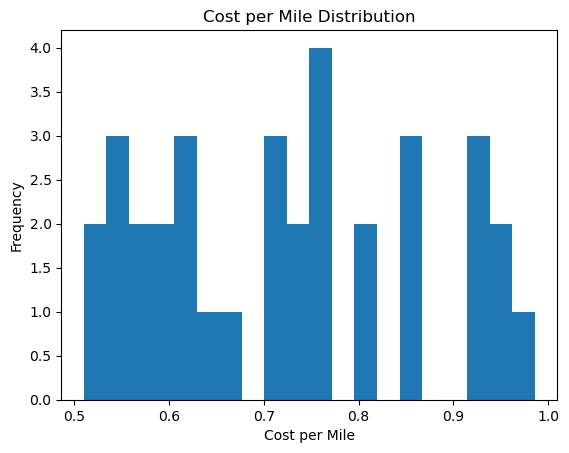

In [16]:
import matplotlib.pyplot as plt

# Histogram of cost per mile
df_clean['Cost_Per_Mile'].plot(kind='hist', bins=20, title='Cost per Mile Distribution')
plt.xlabel('Cost per Mile')
plt.show()

<Axes: title={'center': 'Cost per Mile Distribution'}, ylabel='Frequency'>

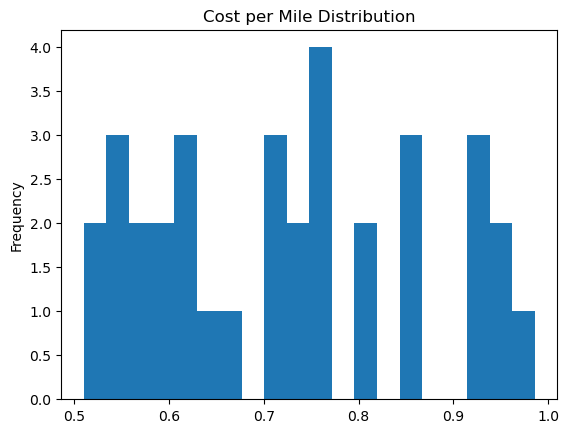

In [17]:
df_clean['Cost_Per_Mile'].plot(kind='hist', bins=20, title='Cost per Mile Distribution')

In [18]:
df_clean.to_excel("cleaned_route_data.xlsx", index=False)